# Proyek Analisis Data: Bike Sharing Data Set
- **Nama:** Patrick Ulysses
- **Email:** ulyssespatrick101@gmail.com
- **ID Dicoding:** Patrick Ulysses

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata penyewaan sepeda per jam? dan bagaimana variasi dari penyewaan sepanjang hari?
- Berapa rata-rata penyewaan sepeda per hari? dan bagaimana variasi sepanajang seminggu?
- Apakah ada hubungan temperatur dengan jumlah penyewaan sepeda?
- Bagaimana perbandingan penyewa registered vs casual?

## Import Semua Packages/Library yang Digunakan

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Reading day.csv

In [165]:
daydf = pd.read_csv('/content/day.csv')
daydf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Reading hour csv

In [166]:
hourdf= pd.read_csv('/content/hour.csv')
hourdf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assesing day data

In [167]:
daydf.shape

(731, 16)

Kode di atas digunakan untuk menginvestigasi bentuk dari dataset day, berdasarkan hasil di atas jelas bahwa dataset day terdiri atas 731 observasi yang dilakukan berdasarkan 16 variabel

In [168]:
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kode di atas digunakan untuk melihat tipe data dari variabel-variabel yang terkandung dalam dataset day

In [169]:
daydf.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kode di atas digunakan untuk melihat jika terdapat data yang kosong

In [170]:
print('Jumlah data duplikat pada dataset day: ',daydf.duplicated().sum() )

Jumlah data duplikat pada dataset day:  0


Kode di atas digunakan untuk melihat jika terdapat data yang berduplikat

#### Assesing hour data

In [171]:
hourdf.shape

(17379, 17)

Kode di atas digunakan untuk menginvestigasi bentuk dari dataset hour, berdasarkan hasil di atas jelas bahwa dataset hour terdiri atas 17.379 observasi yang dilakukan berdasarkan 17: variabel

In [172]:
hourdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kode di atas digunakan untuk melihat tipe data dari variabel-variabel yang terkandung dalam dataset hour

In [173]:
hourdf.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kode di atas digunakan untuk melihat jika terdapat data yang kosong

In [174]:
print('Jumlah data duplikat pada dataset hour : ',hourdf.duplicated().sum() )

Jumlah data duplikat pada dataset hour :  0


Kode di atas digunakan untuk melihat jika terdapat data yang berduplikat

In [175]:
bike_df = hourdf.merge(daydf, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Kode di atas merupakan proses untuk merge dataset day dan hour menjadi sebuah dataset yang dinamakan "bike_df". Merge ini dilakukan mengikuti variabel acuan "dteday"

### Cleaning Data

Membuang data outlier

In [176]:
#Checking ouliers in Target varibale "cnt".

Q1 = bike_df['cnt_hour'].quantile(0.25)
Q3 = bike_df['cnt_hour'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = bike_df[(bike_df['cnt_hour'] < lower_bound) | (bike_df['cnt_hour'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

In [177]:
#removing outliers
bike_df = bike_df[(bike_df['cnt_hour'] >= lower_bound) & (bike_df['cnt_hour'] <= upper_bound)]
print("shape after outliers removal :",bike_df.shape)

shape after outliers removal : (16874, 32)


Kode di atas menggunakan interquartile range untuk membuang data outlier yang dapat menggangu hasil analisis

## Exploratory Data Analysis (EDA)

### Explore ...

In [178]:
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant_hour,16874.0,NaN,NaN,NaN,8542.168899,5007.76604,1.0,4219.25,8438.5,12832.75,17379.0
dteday,16874,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season_hour,16874.0,NaN,NaN,NaN,2.490399,1.111966,1.0,1.0,2.0,3.0,4.0
yr_hour,16874.0,NaN,NaN,NaN,0.487733,0.499864,0.0,0.0,0.0,1.0,1.0
mnth_hour,16874.0,NaN,NaN,NaN,6.513275,3.462438,1.0,4.0,7.0,10.0,12.0
hr,16874.0,NaN,NaN,NaN,11.458101,6.962144,0.0,5.0,11.0,18.0,23.0
holiday_hour,16874.0,NaN,NaN,NaN,0.029513,0.169244,0.0,0.0,0.0,0.0,1.0
weekday_hour,16874.0,NaN,NaN,NaN,2.997748,2.013054,0.0,1.0,3.0,5.0,6.0
workingday_hour,16874.0,NaN,NaN,NaN,0.678618,0.467021,0.0,0.0,1.0,1.0,1.0
weathersit_hour,16874.0,NaN,NaN,NaN,1.430663,0.642689,1.0,1.0,1.0,2.0,4.0


Kode di atas digunakan untuk menampilkan statistik sederhana dari seluruh variabel numerik dalam dataset

In [179]:
bike_df.groupby(by='weekday_day').agg({'cnt_day': ['count', 'mean', 'max', 'min','sum']})

cnt_day                                   
              count         mean   max   min       sum
weekday_day                                           
0              2474  4202.563056  8227   605  10397141
1              2408  4327.889535  7525    22  10421558
2              2367  4494.523447  7767   683  10638537
3              2379  4475.174863  8173   441  10646441
4              2376  4612.836700  7804   431  10960100
5              2419  4630.662257  8362  1167  11201572
6              2451  4476.288454  8714   627  10971383

In [180]:
bike_df.groupby(by='season_day').agg({'cnt_hour': ['count', 'mean', 'max', 'min','sum']})

cnt_hour                             
              count        mean  max min     sum
season_day                                      
1              4223  108.410609  623   1  457818
2              4253  189.459440  642   1  805771
3              4298  211.527687  641   1  909146
4              4100  180.872195  642   1  741576

In [181]:
bike_df.groupby(by='hr').agg({'cnt_hour': ['count', 'mean', 'max', 'min','sum']})

cnt_hour                             
      count        mean  max min     sum
hr                                      
0       726   53.898072  283   2   39130
1       724   33.375691  168   1   24164
2       715   22.869930  132   1   16352
3       697   11.727403   79   1    8174
4       697    6.352941   28   1    4428
5       717   19.889819   66   1   14261
6       725   76.044138  213   1   55132
7       727  212.064649  596   1  154171
8       600  284.525000  641   5  170715
9       727  219.309491  426  14  159438
10      727  173.668501  539   8  126257
11      725  206.910345  627  10  150010
12      711  242.828411  642   3  172651
13      706  239.559490  638  11  169129
14      714  231.647059  640  12  165396
15      716  243.256983  640   7  174172
16      718  305.750696  642  11  219529
17      577  372.551127  638  15  214962
18      599  349.410684  642  23  209297
19      714  304.474790  640  11  217395
20      728  226.030220  567  11  164550
21      728  172.314560  584   6  125445
22      728  131.335165  502   9   95612
23      728   87.831044  256   2   63941

## Visualization & Explanatory Analysis

<ipython-input-182-e0ff4c8d549a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= hourdf.corr()


<Axes: >

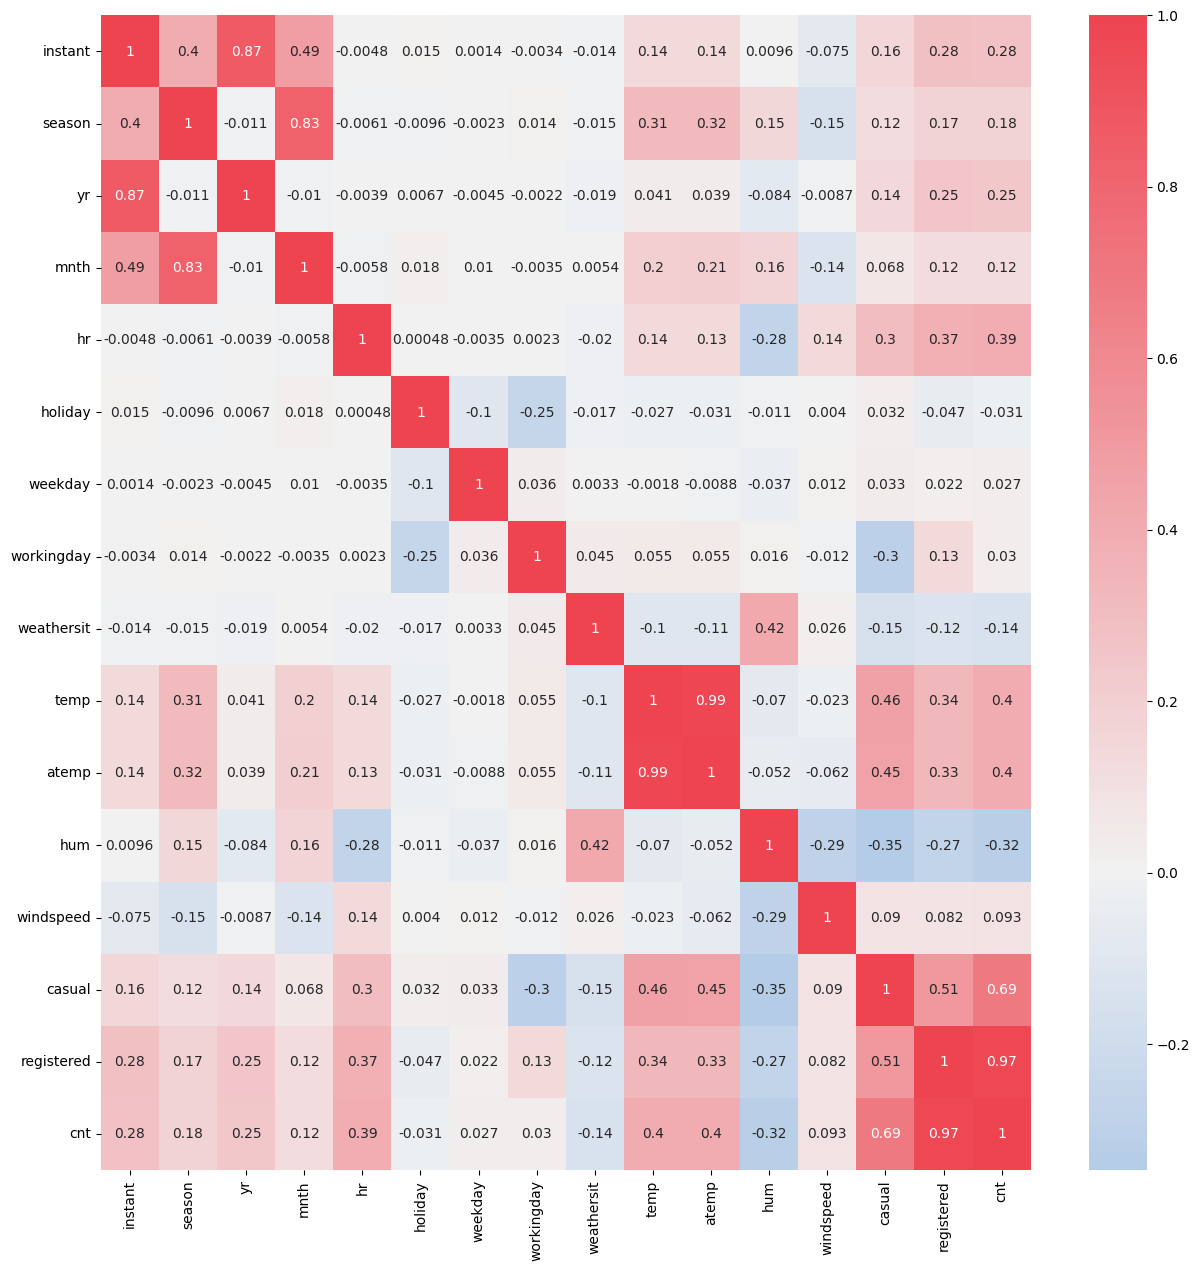

In [182]:
#correlation matrix
corrmat= hourdf.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Gambar di atas merupakan matriks korelasi yang menggambarkan korelasi antar variabel dalam dataset hour

### Berapa rata-rata penyewaan sepeda per jam? dan bagaimana variasi dari penyewaan sepanjang hari?

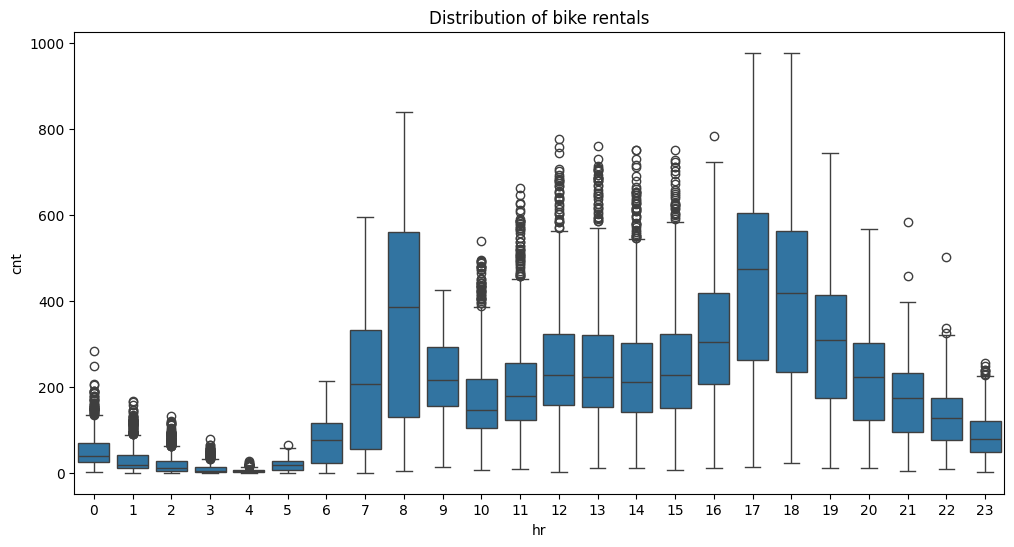

In [183]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=hourdf)
plt.title('Distribution of bike rentals')
plt.show()

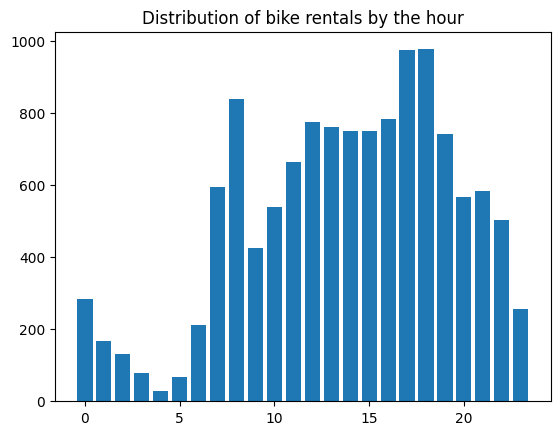

In [184]:
plt.bar(x='hr',height='cnt',data=hourdf)
plt.title('Distribution of bike rentals by the hour')
plt.show()

[Text(0.5, 1.0, 'Distribution of bike rentals by the hour of each day')]

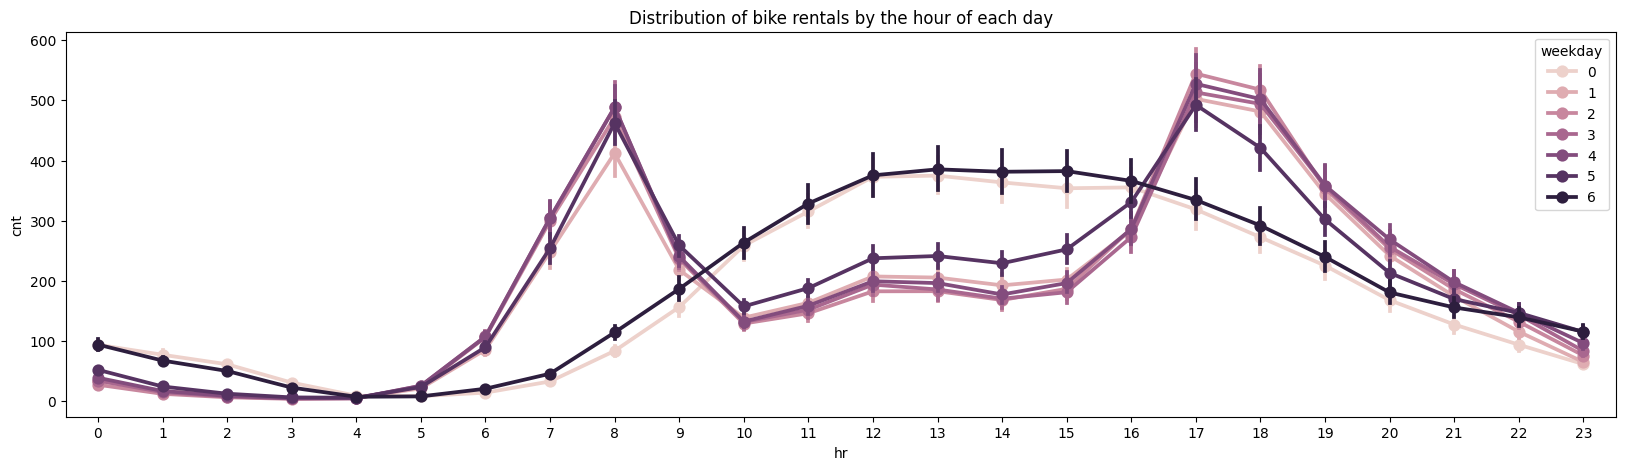

In [185]:
fig , ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = hourdf , x = 'hr', y = 'cnt', hue = 'weekday')
sns.color_palette("tab10")
ax.set(title = 'Distribution of bike rentals by the hour of each day')

### Berapa rata-rata penyewaan sepeda per hari? dan bagaimana variasi sepanajang seminggu?

Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

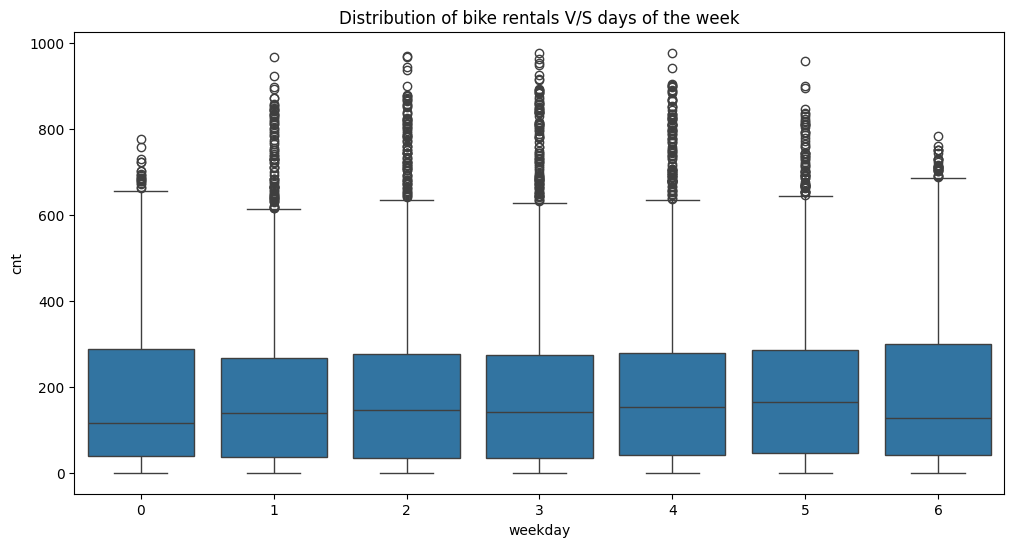

In [186]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=hourdf)
plt.title('Distribution of bike rentals V/S days of the week')

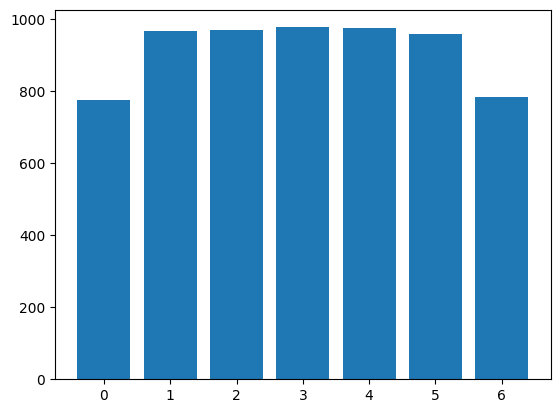

In [187]:
plt.bar(x='weekday',height='cnt',data=hourdf)
plt.show()

### Apakah ada hubungan temperatur dengan jumlah penyewaan sepeda?

In [188]:
x_scatter=bike_df.temp_day
y_scatter=bike_df.cnt_day

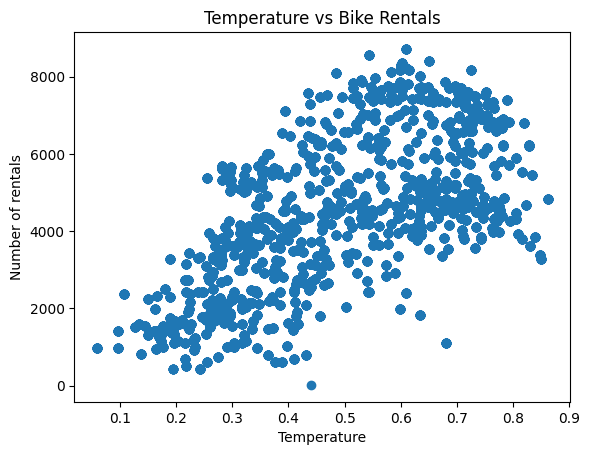

In [189]:
plt.xlabel('Temperature')
plt.ylabel('Number of rentals')
plt.title('Temperature vs Bike Rentals')
plt.scatter(x_scatter,y_scatter)

### Bagaimana perbandingan penyewa registered vs casual?

In [190]:
number_of_casual_users=bike_df['casual_hour'].sum()
number_of_registered_users=bike_df['registered_hour'].sum()

<BarContainer object of 2 artists>

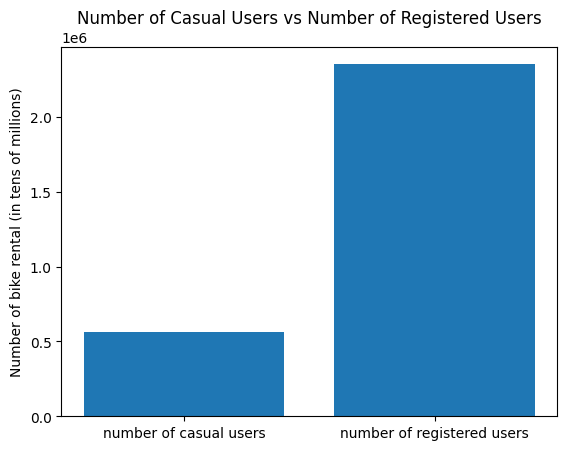

In [191]:
x=['number of casual users','number of registered users']
y=[number_of_casual_users,number_of_registered_users]
plt.ylabel('Number of bike rental (in tens of millions)')
plt.title('Number of Casual Users vs Number of Registered Users')
plt.bar(x,y)

## Conclusion

- **Conclution pertanyaan 1: Berapa rata-rata penyewaan sepeda per jam? dan bagaimana variasi dari penyewaan sepanjang hari?**
1.   Rata-rata penyewaan sepeda terbanyak terjadi di sekitar pukul 8-11 dan pukul 16-18. Hal ini mungkin terjadi mengingat bahwa pada jam-jam tersebut merupakan jam puncak mobilisasi masyarakat untuk ke beraktivitas, baik itu bekerja ataupun bersekolah. Penggunaan sepeda mungkin menjadi sarana transportasi yang populer dalam kalangan masyarakat
2.   Selain itu, tingginya penyewaan pada pukul 8-10 dan pukul 16-18 juga mungkin terjadi karena pada jam-jam tersebut orang sedang memulai hari ataupun mengakhiri harinya dengan olahraga dan aktifitas fisik, sepeda dapat menjadi aktifitas pilihan


- **Conclution pertanyaan 2 : Berapa rata-rata penyewaan sepeda per hari? dan bagaimana variasi sepanajang seminggu?**

1.   Persebaran penyewaan sepeda berdasarkan hari secara umum tersebar merata dengan tingkat penyewaan yang lebih rendah jatuh pada hari sabtu dan minggu. Hal ini mungkin terjadi karena pada hari-hari tersebut minim terjadi mobilisasi untuk aktifitas bekerja ataupun bersekolah akibatnya angka penyewaan sepeda di hari-hari tersebut cenderung rendah jika dibandingkan dengan hari lain.
2.   Ada kemungkinan bahwa sekelompok pengguna tertentu, seperti pekerja atau pelajar, secara spesifik memanfaatkan layanan penyewaan sepeda pada hari-hari kerja.

- **Conclution pertanyaan 3 : Apakah ada hubungan temperatur dengan jumlah penyewaan sepeda?**

1.   Ada hubungan yang erat yang positif antara temperatur udara dengan jumlah penyewaan sepeda. Hal tersebut berarti bahwa semakin tinggi temperatur udara maka tingkat penyewaan semakin tinggi dan begitu juga sebaliknya. Hal ini tentu ada kaitannya dengan cuaca semakin nyaman dan kondusif cuaca untuk bersepeda maka akan semakin tinggi juga tingkat penyewaan sepeda.


- **Conclution pertanyaan 4 : Bagaimana perbandingan penyewa registered vs casual?**

1.   Secara keseluruhan lebih banyak penyewa sepeda yang sudah meregistrasikan dirinya dibanding pengguna yang casual. Hal ini berarti jika seseorang sudah meregistrasikan dirinya maka akan semakin tinggi juga peluang orang tersebut untuk menggunakan jasa penyewaan sepeda kembali.




